# IST 652 - Final Project
## Does Airbnb have a negative effect on the real estate rental market in NYC?

## Importing the data

In [7]:
import pandas as pd
import numpy as np

In [8]:
# Importing the AirBnb dataset. Each dataset is from January of each year
ny2015 = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/NY_01-2015.csv', 
                   index_col=0)
ny2016 = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/NY_01-2016.csv', 
                   index_col=0)
ny2017 = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/NY_01-2017.csv', 
                   index_col=0)
ny2018 = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/NY_01-2018.csv', 
                   index_col=0)
ny2019 = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/NY_01-2019.csv', 
                   index_col=0)
ny2020 = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/NY_01-2020.csv', 
                   index_col=0)

In [9]:
#Import the Streeteasy rental inventory dataset
rental_df = pd.read_csv('/Users/ihrtrobot/Desktop/IST652/Final Project/rentalInventory_All.csv')
rental_df.head(5)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
0,Bronx,Bronx,borough,165,183,186,154,138,119,107,...,885,837,731,719,653,569,427,568,678,772
1,Brooklyn,Brooklyn,borough,1831,1799,1860,1857,1688,1637,1577,...,10395,9183,8228,9301,8831,8104,7341,13011,18189,22708
2,Manhattan,Manhattan,borough,12925,13461,13650,13933,13191,13602,12919,...,16595,14677,13422,14547,13308,12426,12395,20029,28572,37195
3,Queens,Queens,borough,562,587,599,567,538,548,530,...,4710,4151,3697,4146,3887,3304,2593,3855,5304,6637
4,Staten Island,Staten Island,borough,7,5,6,6,2,3,2,...,65,62,49,49,51,46,26,40,38,36


## Data Cleaning

In [10]:
# Subsetting the streeteasy dataset to only show the 5 NYC boroughs
borough = rental_df[rental_df['areaType']=='borough']
# Removing the borough and areaType columns
borough = borough.drop(columns = ['Borough','areaType'])
# setting the index to the borough name column
borough = borough.set_index('areaName')
borough.head(3)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
areaName,,,,,,,,,,,,,,,,,,,,,
Bronx,165,183,186,154,138,119,107,109,81,97,...,885,837,731,719,653,569,427,568,678,772
Brooklyn,1831,1799,1860,1857,1688,1637,1577,1581,1384,1429,...,10395,9183,8228,9301,8831,8104,7341,13011,18189,22708
Manhattan,12925,13461,13650,13933,13191,13602,12919,12190,10718,10531,...,16595,14677,13422,14547,13308,12426,12395,20029,28572,37195


In [11]:
# Transposing the rows and columns of the original dataframe
# Adding an index column and renaming the YearMonth column
boro_df = borough.T
boro_df = boro_df.reset_index()
boro_df = boro_df.rename(columns = {'index':'YearMonth'})
boro_df.head(3)

areaName,YearMonth,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2010-01,165,1831,12925,562,7
1,2010-02,183,1799,13461,587,5
2,2010-03,186,1860,13650,599,6


In [12]:
# Adding a Year and Month column for analysis purposes
boro_df['Year'] = boro_df['YearMonth'].str.split('-').str[0]
boro_df['Month'] = boro_df['YearMonth'].str.split('-').str[-1]
boro_df.head(3)

areaName,YearMonth,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Year,Month
0,2010-01,165,1831,12925,562,7,2010,01
1,2010-02,183,1799,13461,587,5,2010,02
2,2010-03,186,1860,13650,599,6,2010,03


In [13]:
# Creating a neighborhood only dataframe and removing redundant name columns
neigh = rental_df[rental_df['areaType']=='neighborhood']
neighborhood = ['Bedford-Stuyvesant', 'Williamsburg', 'Bushwick', 'Midtown West', 'Upper West Side'
                , 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown', 'Central Harlem']
neigh = neigh[neigh.areaName.isin(neighborhood)]
neigh = neigh.drop(columns = ['Borough','areaType'])
neigh = neigh.set_index('areaName')
neigh.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
areaName,,,,,,,,,,,,,,,,,,,,,
Bedford-Stuyvesant,132,122,118,121,105,110,101,113,107,129,...,1405,1261,1136,1344,1258,1162,1013,1959,2607,3304
Bushwick,13,12,20,52,41,18,22,16,21,19,...,1142,930,793,895,901,863,816,1636,2316,2922
Central Harlem,430,402,345,316,288,325,302,301,262,281,...,721,643,575,671,620,576,462,792,1159,1479
Crown Heights,87,78,78,84,83,67,67,79,73,61,...,908,851,853,969,842,761,686,1184,1734,1983
East Village,457,486,537,539,562,566,499,422,343,321,...,857,674,622,659,628,631,786,1548,2290,3022


In [14]:
# Transposing the rows and columns of the original dataframe
# Adding an index column and renaming the YearMonth column
neigh_df = neigh.T
neigh_df = neigh_df.reset_index()
neigh_df = neigh_df.rename(columns = {'index':'YearMonth'})
neigh_df['Year'] = neigh_df['YearMonth'].str.split('-').str[0]
neigh_df['Month'] = neigh_df['YearMonth'].str.split('-').str[-1]
neigh_df.head(20)

areaName,YearMonth,Bedford-Stuyvesant,Bushwick,Central Harlem,Crown Heights,East Village,Midtown,Midtown West,Upper East Side,Upper West Side,Williamsburg,Year,Month
0,2010-01,132,13,430,87,457,489,774,2550,2164,317,2010,01
1,2010-02,122,12,402,78,486,454,826,2652,2188,315,2010,02
2,2010-03,118,20,345,78,537,414,817,2641,2309,342,2010,03
3,2010-04,121,52,316,84,539,440,896,2589,2455,316,2010,04
4,2010-05,105,41,288,83,562,400,826,2500,2327,282,2010,05
5,2010-06,110,18,325,67,566,365,895,2670,2414,303,2010,06
6,2010-07,101,22,302,67,499,353,911,2579,2220,308,2010,07
7,2010-08,113,16,301,79,422,384,715,2556,1924,305,2010,08
8,2010-09,107,21,262,73,343,374,640,2339,1699,236,2010,09
9,2010-10,129,19,281,61,321,381,682,2378,1669,220,2010,10


## Exploratory Analysis

### Airbnb Data

In [15]:
# Calculating the Average Price by Borough for each of the years
df15 = ny2015.groupby('neighbourhood_group')['price'].mean()
df16 = ny2016.groupby('neighbourhood_group')['price'].mean()
df17 = ny2017.groupby('neighbourhood_group')['price'].mean()
df18 = ny2018.groupby('neighbourhood_group')['price'].mean()
df19 = ny2019.groupby('neighbourhood_group')['price'].mean()
df20 = ny2020.groupby('neighbourhood_group')['price'].mean()

# Merging all of the Average Prices by Boroughs into on dataframe
df = pd.merge(df15, df16, on='neighbourhood_group')
df = pd.merge(df, df17, on='neighbourhood_group')
df = pd.merge(df, df18, on='neighbourhood_group')
df = pd.merge(df, df19, on='neighbourhood_group')
df = pd.merge(df, df20, on='neighbourhood_group')
df.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
df

,2015,2016,2017,2018,2019,2020
neighbourhood_group,,,,,,
Bronx,83.066406,82.159645,80.247295,87.113450,86.289825,89.158576
Brooklyn,129.712820,122.364759,120.069892,118.199901,121.196501,125.055593
Manhattan,206.289978,183.182927,180.846515,183.309904,192.046676,217.641681
Queens,103.336830,95.306306,94.412698,98.099921,100.514431,98.688015
Staten Island,185.215385,135.418478,103.939394,128.153355,110.292169,103.127937


In [16]:
df = df.T
df

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
2015,83.066406,129.712820,206.289978,103.336830,185.215385
2016,82.159645,122.364759,183.182927,95.306306,135.418478
2017,80.247295,120.069892,180.846515,94.412698,103.939394
2018,87.113450,118.199901,183.309904,98.099921,128.153355
2019,86.289825,121.196501,192.046676,100.514431,110.292169
2020,89.158576,125.055593,217.641681,98.688015,103.127937


In [17]:
# Calculating the Average Price by Borough by room type for each of the years
df15 = ny2015.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df16 = ny2016.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df17 = ny2017.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df18 = ny2018.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df19 = ny2019.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df20 = ny2020.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

# Merging all of the Average Prices by Boroughs & room type into on dataframe
df1 = pd.merge(df15, df16, on = ['neighbourhood_group', 'room_type'])
df1 = pd.merge(df1, df17, on = ['neighbourhood_group', 'room_type'])
df1 = pd.merge(df1, df18, on = ['neighbourhood_group', 'room_type'])
df1 = pd.merge(df1, df19, on = ['neighbourhood_group', 'room_type'])
df1 = pd.merge(df1, df20, on = ['neighbourhood_group', 'room_type'])
df1.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
df1

2015        2016        2017  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt  126.350649  129.807692  118.473404   
                    Private room      65.329193   64.938849   65.961995   
                    Shared room       56.555556   49.441860   49.394737   
Brooklyn            Entire home/apt  179.257726  175.243116  172.871493   
                    Private room      81.006488   75.703212   77.824555   
                    Shared room       59.640000   55.687351   66.046196   
Manhattan           Entire home/apt  254.762031  230.669392  237.402078   
                    Private room     115.525441  105.107148  107.711729   
                    Shared room       92.097561   82.796992  105.128623   
Queens              Entire home/apt  141.001289  140.535679  140.784431   
                    Private room      73.027083   68.292279   68.660413   
                    Shared room      101.600000   77.116667   56.516129   
Staten Island       Entire home/apt  299.179104  244.514286  168.310345   
                    Private room      64.483871   69.018018   65.521127   
                    Shared room       35.000000   46.666667   31.500000   

                                           2018        2019        2020  
neighbourhood_group room_type                                            
Bronx               Entire home/apt  129.200787  120.084548  130.185022  
                    Private room      69.853832   67.905172   64.394993  
                    Shared room       61.925000   67.720000   76.126984  
Brooklyn            Entire home/apt  171.402973  173.691955  178.176500  
                    Private room      75.888051   74.579226   75.922995  
                    Shared room       53.857513   51.893424   72.736961  
Manhattan           Entire home/apt  239.713567  241.025170  243.447586  
                    Private room     106.042473  111.829581  178.675257  
                    Shared room       86.425000   85.489224   86.327935  
Queens              Entire home/apt  144.769950  144.446798  145.627375  
                    Private room      73.760396   75.477941   70.350402  
                    Shared room       51.472574   65.800000   77.800000  
Staten Island       Entire home/apt  202.423611  167.894040  143.580311  
                    Private room      65.415663   61.983240   62.924324  
                    Shared room       34.666667   85.000000   29.200000

In [18]:
# Calculating the number of Airbnb listings for each of the years by boroughs & room type
df15 = ny2015.groupby(['neighbourhood_group', 'room_type'])['neighbourhood'].count()
df16 = ny2016.groupby(['neighbourhood_group', 'room_type'])['neighbourhood'].count()
df17 = ny2017.groupby(['neighbourhood_group', 'room_type'])['neighbourhood'].count()
df18 = ny2018.groupby(['neighbourhood_group', 'room_type'])['neighbourhood'].count()
df19 = ny2019.groupby(['neighbourhood_group', 'room_type'])['neighbourhood'].count()
df20 = ny2020.groupby(['neighbourhood_group', 'room_type'])['neighbourhood'].count()

# Merging all of the borough listings into one dataframe
df3 = pd.merge(df15, df16, on = ['neighbourhood_group', 'room_type'])
df3 = pd.merge(df3, df17, on = ['neighbourhood_group', 'room_type'])
df3 = pd.merge(df3, df18, on = ['neighbourhood_group', 'room_type'])
df3 = pd.merge(df3, df19, on = ['neighbourhood_group', 'room_type'])
df3 = pd.merge(df3, df20, on = ['neighbourhood_group', 'room_type'])
df3.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
df3

2015   2016   2017   2018   2019   2020
neighbourhood_group room_type                                                
Bronx               Entire home/apt     77    130    188    254    343    454
                    Private room       161    278    421    561    580    719
                    Shared room         18     43     38     40     50     63
Brooklyn            Entire home/apt   4854   6573   7486   9013   9807  10000
                    Private room      4470   6850   8886  10746  10388  10376
                    Shared room        325    419    368    386    441    441
Manhattan           Entire home/apt  10203  11866  11070  12928  14541  13689
                    Private room      4933   6533   7989   8735   8262   8071
                    Shared room        410    532    552    560    464    494
Queens              Entire home/apt    776   1023   1336   1817   2030   2316
                    Private room       960   1632   2132   3030   3264   3730
                    Shared room         75    120    186    237    215    225
Staten Island       Entire home/apt     67     70     87    144    151    193
                    Private room        62    111    142    166    179    185
                    Shared room          1      3      2      3      2      5

In [89]:
# Calculating the number of Airbnb listings for each of the years by boroughs
df15 = ny2015.groupby(['neighbourhood_group'])['neighbourhood'].count()
df16 = ny2016.groupby(['neighbourhood_group'])['neighbourhood'].count()
df17 = ny2017.groupby(['neighbourhood_group'])['neighbourhood'].count()
df18 = ny2018.groupby(['neighbourhood_group'])['neighbourhood'].count()
df19 = ny2019.groupby(['neighbourhood_group'])['neighbourhood'].count()
df20 = ny2020.groupby(['neighbourhood_group'])['neighbourhood'].count()

# Merging all of the borough listings into one dataframe
df2 = pd.merge(df15, df16, on='neighbourhood_group')
df2 = pd.merge(df2, df17, on='neighbourhood_group')
df2 = pd.merge(df2, df18, on='neighbourhood_group')
df2 = pd.merge(df2, df19, on='neighbourhood_group')
df2 = pd.merge(df2, df20, on='neighbourhood_group')
df2.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
cols = ['2015', '2016', '2017', '2018', '2019', '2020']
df2

,2015,2016,2017,2018,2019,2020
neighbourhood_group,,,,,,
Bronx,256,451,647,855,973,1236
Brooklyn,9649,13842,16740,20145,20636,20848
Manhattan,15546,18931,19611,22223,23267,22586
Queens,1811,2775,3654,5084,5509,6308
Staten Island,130,184,231,313,332,383


In [92]:
df2['2015 %'] = round((df2['2015']/df2['2015'].sum())*100,2)
df2['2016 %'] = round((df2['2016']/df2['2016'].sum())*100,2)
df2['2017 %'] = round((df2['2017']/df2['2017'].sum())*100,2)
df2['2018 %'] = round((df2['2018']/df2['2018'].sum())*100,2)
df2['2019 %'] = round((df2['2019']/df2['2019'].sum())*100,2)
df2['2020 %'] = round((df2['2020']/df2['2020'].sum())*100,2)
df2

,2015,2016,2017,2018,2019,2020,2015 %,2016 %,2017 %,2018 %,2019 %,2020 %
neighbourhood_group,,,,,,,,,,,,
Bronx,256,451,647,855,973,1236,0.93,1.25,1.58,1.76,1.92,2.41
Brooklyn,9649,13842,16740,20145,20636,20848,35.23,38.26,40.95,41.43,40.69,40.59
Manhattan,15546,18931,19611,22223,23267,22586,56.75,52.32,47.97,45.71,45.88,43.98
Queens,1811,2775,3654,5084,5509,6308,6.61,7.67,8.94,10.46,10.86,12.28
Staten Island,130,184,231,313,332,383,0.47,0.51,0.57,0.64,0.65,0.75


In [282]:
# Calculating the number of Airbnb listings for each of the years by room type
df15 = ny2015.groupby(['room_type'])['neighbourhood'].count()
df16 = ny2016.groupby(['room_type'])['neighbourhood'].count()
df17 = ny2017.groupby(['room_type'])['neighbourhood'].count()
df18 = ny2018.groupby(['room_type'])['neighbourhood'].count()
df19 = ny2019.groupby(['room_type'])['neighbourhood'].count()
df20 = ny2020.groupby(['room_type'])['neighbourhood'].count()

# Merging all of the room type listings into one dataframe
df4 = pd.merge(df15, df16, on='room_type')
df4 = pd.merge(df4, df17, on='room_type')
df4 = pd.merge(df4, df18, on='room_type')
df4 = pd.merge(df4, df19, on='room_type')
df4 = pd.merge(df4, df20, on='room_type')
df4.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
df4

,2015,2016,2017,2018,2019,2020
room_type,,,,,,
Entire home/apt,15977,19662,20167,24156,26872,26652
Private room,10586,15404,19570,23238,22673,23081
Shared room,829,1117,1146,1226,1172,1228


In [283]:
# Calculating the number of Airbnb listings for each of the years by room type
df15 = ny2015.groupby(['neighbourhood'])['room_type'].count()
df16 = ny2016.groupby(['neighbourhood'])['room_type'].count()
df17 = ny2017.groupby(['neighbourhood'])['room_type'].count()
df18 = ny2018.groupby(['neighbourhood'])['room_type'].count()
df19 = ny2019.groupby(['neighbourhood'])['room_type'].count()
df20 = ny2020.groupby(['neighbourhood'])['room_type'].count()

# Merging all of the room type listings into one dataframe
df5 = pd.merge(df15, df16, on='neighbourhood')
df5 = pd.merge(df5, df17, on='neighbourhood')
df5 = pd.merge(df5, df18, on='neighbourhood')
df5 = pd.merge(df5, df19, on='neighbourhood')
df5 = pd.merge(df5, df20, on='neighbourhood')
df5.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
df5_sort = df5.sort_values(by=['2020'], ascending=False)
df5_sort.head(10)

,2015,2016,2017,2018,2019,2020
neighbourhood,,,,,,
Bedford-Stuyvesant,1224,1985,2757,3480,3709,4012
Williamsburg,2021,3203,3796,4324,4212,3977
Harlem,934,2005,2519,2870,2812,2793
Bushwick,1098,1597,1939,2470,2512,2503
Hell's Kitchen,1299,1508,1584,1898,2214,2129
Upper West Side,1410,1822,1789,2033,2095,2016
East Village,897,2080,1962,2157,2025,1919
Upper East Side,1319,1582,1541,1779,1927,1800
Crown Heights,810,1137,1299,1646,1633,1640


### Streeteasy Data

In [290]:
# Creating a pivot table to show the average inventory by Borough by Year
pivot1 = boro_df.pivot_table(values=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], 
                          index=['Year'], aggfunc=np.mean)
round(pivot1,2)

areaName,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Year,,,,,
2010,128.67,1641.50,12288.50,544.33,4.58
2011,153.08,1826.83,11021.92,510.25,4.75
2012,225.92,2318.58,12709.42,854.50,11.58
2013,227.58,3807.17,16056.42,1116.42,27.58
2014,451.08,7650.42,19418.00,2476.00,43.50
2015,730.83,10942.08,20933.58,3385.50,77.08
2016,797.42,11696.67,22447.58,3895.92,86.75
2017,829.17,14528.25,22406.42,5431.17,82.33
2018,868.50,15101.33,19622.42,5142.83,85.42


In [291]:
# Creating a pivot table to show the average inventory by Borough by Month
pivot2 = boro_df.pivot_table(values=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], 
                          index=['Month'], aggfunc=np.mean)
round(pivot2,2)

areaName,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Month,,,,,
01,526.82,7546.73,15767.09,2580.91,48.27
02,517.45,7327.73,15540.82,2657.91,49.36
03,527.55,7730.91,16631.64,2850.09,50.36
04,496.27,7803.00,17400.27,2868.55,46.64
05,528.09,9096.82,19159.00,3170.45,51.64
06,548.45,10056.64,20612.82,3387.64,44.00
07,588.73,10927.27,21771.73,3431.00,44.18
08,569.00,9460.00,19425.20,2789.10,41.80
09,551.70,8431.80,17330.00,2693.50,46.00


In [347]:
# Creating a pivot table to show the average inventory by Borough by Year for the top 10 neighbourhoods of Airbnb
pivot3 = neigh_df.pivot_table(values=['Bedford-Stuyvesant', 'Williamsburg', 'Bushwick', 'Midtown West'
                                      , 'Upper West Side', 'East Village', 'Upper East Side', 'Crown Heights'
                                      , 'Midtown', 'Central Harlem'], 
                          index=['Year'], aggfunc=np.mean)
round(pivot3,2)

areaName,Bedford-Stuyvesant,Bushwick,Central Harlem,Crown Heights,East Village,Midtown,Midtown West,Upper East Side,Upper West Side,Williamsburg
Year,,,,,,,,,,
2010,118.33,25.42,313.00,78.83,448.00,399.67,772.33,2513.33,2045.25,277.75
2011,156.50,55.67,286.00,116.67,398.75,344.50,714.25,2225.25,1791.75,271.25
2012,212.17,71.92,430.33,127.92,585.00,396.08,865.92,2279.00,1988.00,493.75
2013,378.33,161.42,585.92,206.67,810.33,435.25,1091.58,2734.00,2353.00,771.25
2014,902.58,471.42,768.42,564.42,1088.67,511.50,1330.67,3160.67,2861.75,1278.83
2015,1425.92,915.58,898.58,920.83,1262.17,575.33,1538.83,3307.50,3026.92,1709.83
2016,1554.92,1055.58,1033.67,928.50,1249.33,634.25,1685.92,3658.08,3126.42,1835.33
2017,1882.75,1358.17,955.08,1304.50,1357.25,546.17,1697.83,3356.00,3059.58,2007.42
2018,1866.50,1903.50,864.58,1316.67,1206.50,481.75,1552.75,3039.67,2708.25,2588.67


### Visualizations

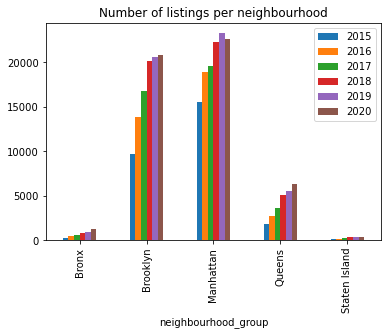

In [231]:
# Creating a bar graph showing the number of listings per neighbourhood for Airbnb
df2.plot.bar(title = 'Number of listings per neighbourhood')

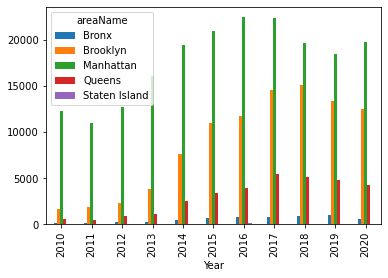

In [352]:
# bar plot that shows average number of streeteasy inventory by borough by year
pivot1.plot.bar()

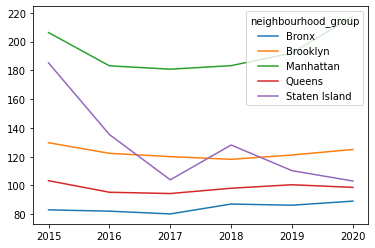

In [245]:
# Creating a line graph of the average price of airbnb rentals per borough per year
df.plot.line()

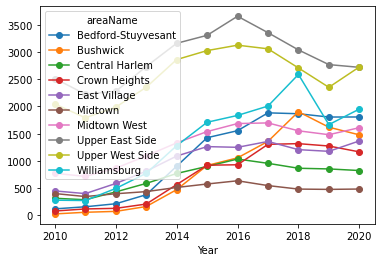

In [351]:
pivot3.plot.line(marker='o')